http://preview.d2l.ai/d2l-en/PR-1111/chapter_multilayer-perceptrons/underfit-overfit.html#linear-function-fitting-underfitting

In [1]:
from d2l import torch as d2l
import torch
from torch import nn
import numpy as np
import math

In [2]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [3]:
features[:2].T, poly_features[:2, :], labels[:2]

(array([[-0.13621415, -1.44417765]]),
 array([[ 1.00000000e+00, -1.36214147e-01,  9.27714688e-03,
         -4.21226215e-04,  1.43442424e-05, -3.90777747e-07,
          8.87157623e-09, -1.72633455e-10,  2.93938985e-12,
         -4.44873867e-14,  6.05981141e-16, -7.50392765e-18,
          8.51784251e-20, -8.92500499e-22,  8.68365671e-24,
         -7.88557926e-26,  6.71329656e-28, -5.37909390e-30,
          4.07060381e-32, -2.91828329e-34],
        [ 1.00000000e+00, -1.44417765e+00,  1.04282455e+00,
         -5.02007968e-01,  1.81247172e-01, -5.23506232e-02,
          1.26006000e-02, -2.59964357e-03,  4.69293393e-04,
         -7.53047812e-05,  1.08753482e-05, -1.42781226e-06,
          1.71834546e-07, -1.90892009e-08,  1.96915696e-09,
         -1.89587498e-10,  1.71123767e-11, -1.45372424e-12,
          1.16635337e-13, -8.86537614e-15]]),
 array([ 4.7981151 , -2.98723492]))

In [4]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [5]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

In [6]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

TypeError: 'int' object is not callable

In [7]:
train(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4],
      labels[:n_train].reshape(-1,1), labels[n_train:].reshape(-1,1))

TypeError: 'int' object is not callable

weight: [[ 5.0027905  1.214132  -3.3796022  5.595286 ]]


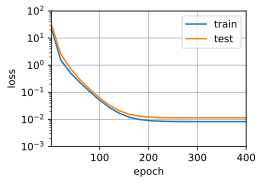

In [8]:
features = torch.from_numpy(features).type(torch.float32)
poly_features = torch.from_numpy(poly_features).type(torch.float32)
labels = torch.from_numpy(labels).type(torch.float32)

# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])